1. Análisis exploratorio de datos
Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123     

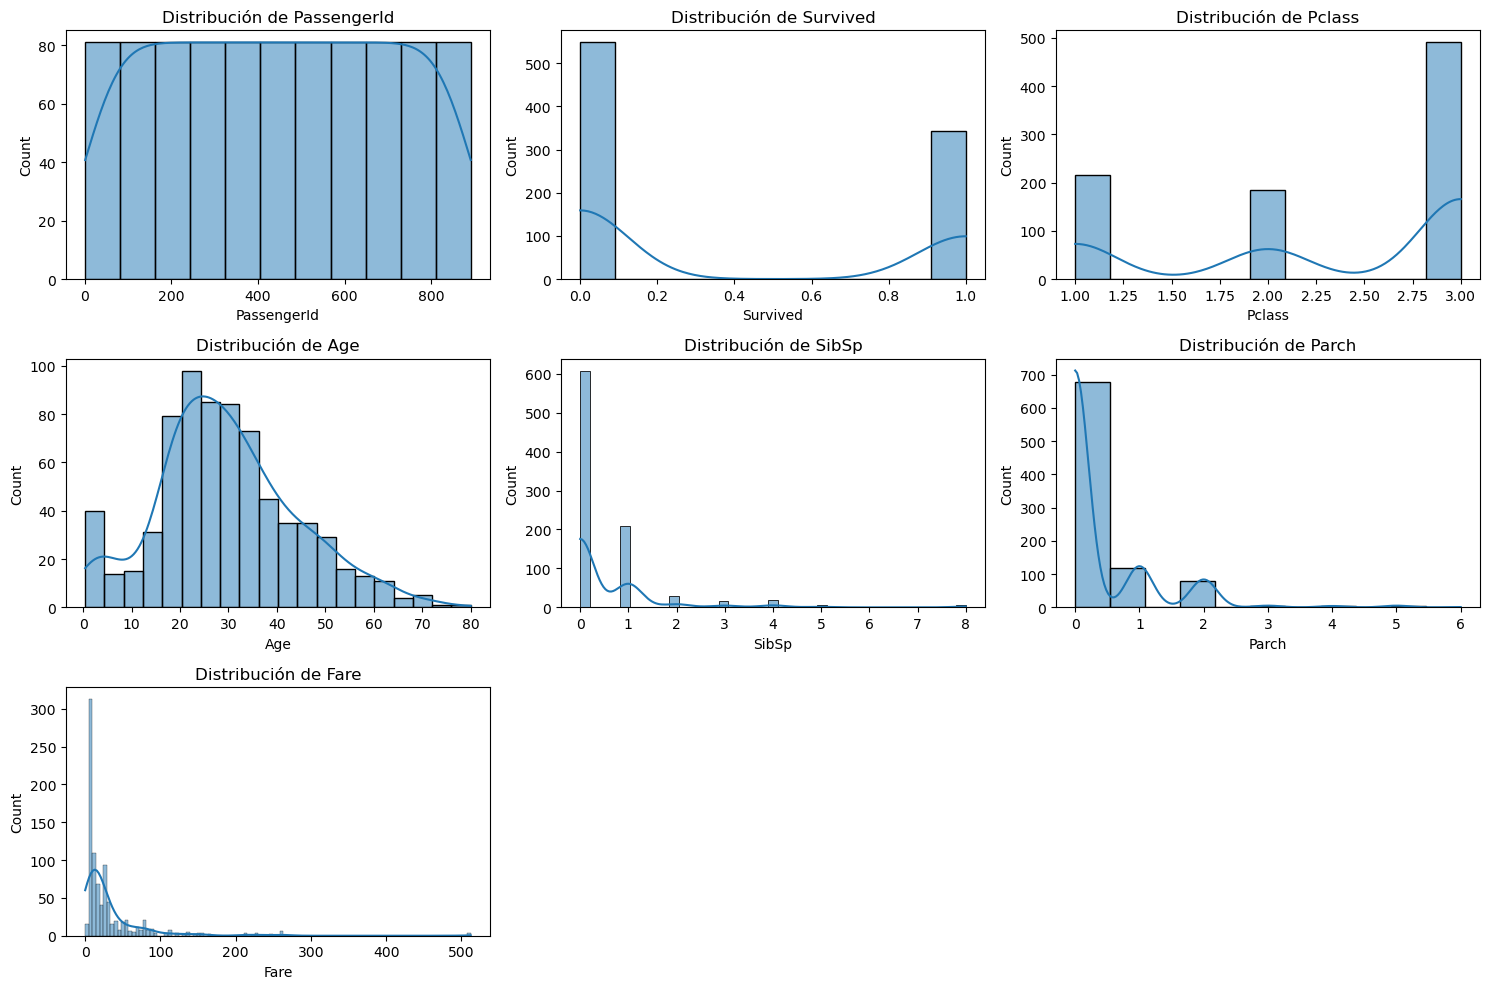

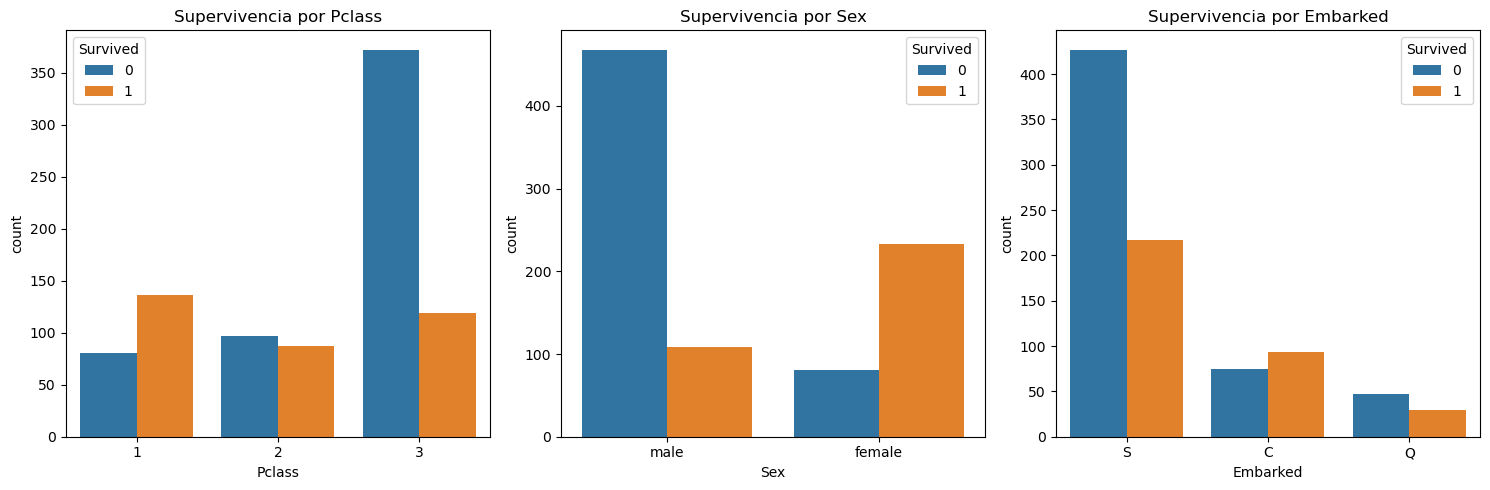


2. Preprocesamiento de datos

3. Preparación de los datos para el modelo

4. División del dataset

5. Entrenamiento del modelo

6. Evaluación del modelo

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



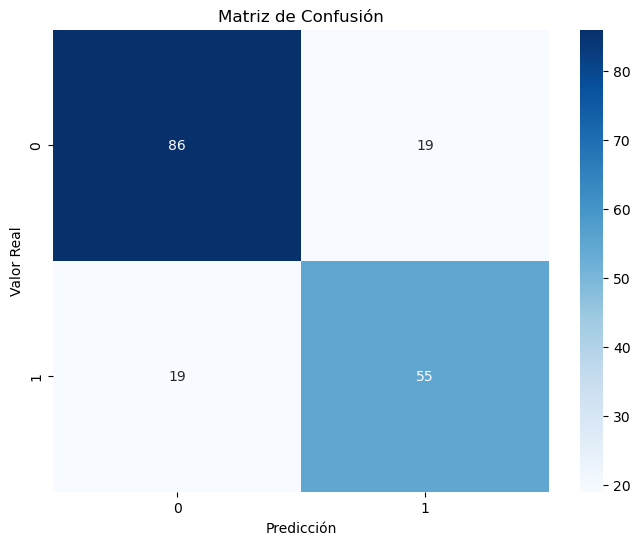

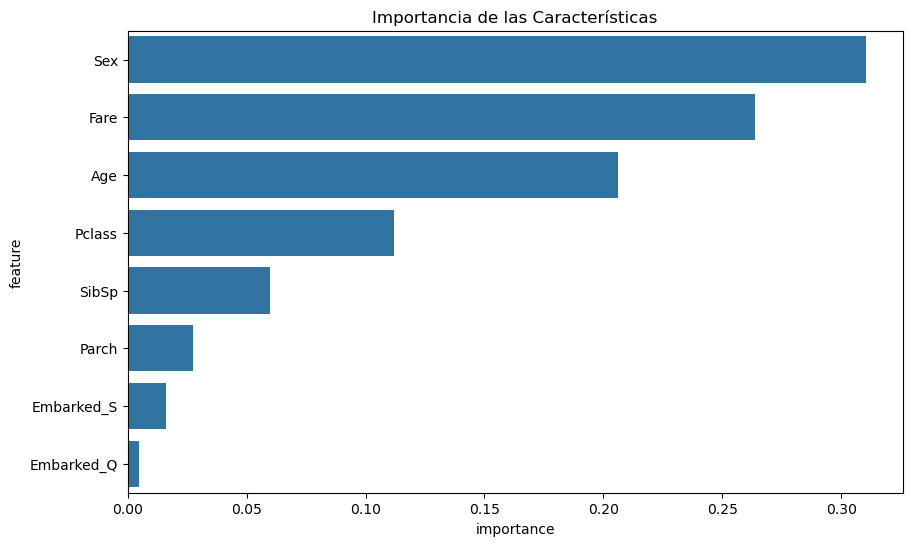

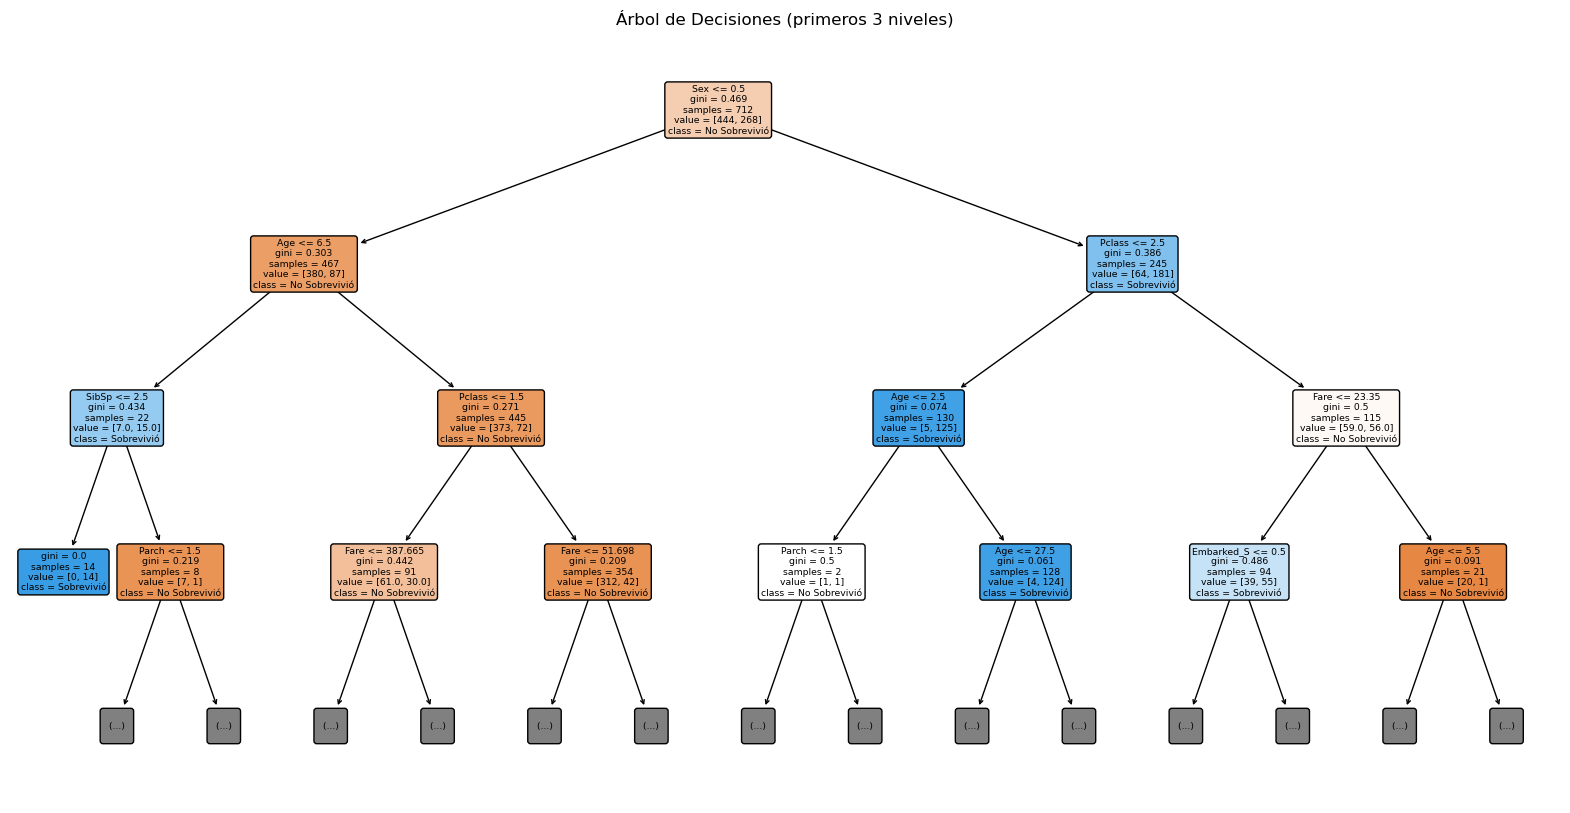

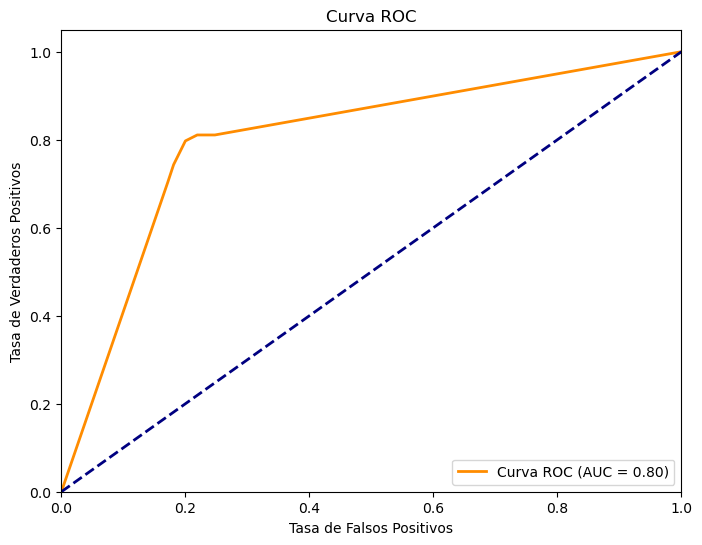


8. Interpretación, análisis y documentación de resultados
a) Resumen del modelo:
   - Precisión del modelo en el conjunto de prueba: 0.788

b) Características más importantes:
      feature  importance
1         Sex    0.310280
5        Fare    0.263543
2         Age    0.206181
0      Pclass    0.111937
3       SibSp    0.059694
4       Parch    0.027496
7  Embarked_S    0.016200
6  Embarked_Q    0.004669

c) Interpretación detallada de los resultados:
   1. Desempeño del modelo:
      - La precisión del modelo es 0.788, lo que significa que predice correctamente la supervivencia en aproximadamente el 78.8% de los casos.
      - Según el informe de clasificación, el modelo tiene un buen equilibrio entre precisión y exhaustividad para ambas clases (sobrevivientes y no sobrevivientes).

   2. Importancia de las características:
      - Sex: Esta característica tiene una importancia de 0.3103 en la predicción de supervivencia.
      - Fare: Esta característica tiene una importancia de 0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 1. Análisis exploratorio de datos
print("1. Análisis exploratorio de datos")

# Cargando los datos
url = "Titanic-Dataset.csv"
df = pd.read_csv(url)

# Mostrando las primeras filas y la información del DataFrame
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas solo para columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nEstadísticas descriptivas de variables numéricas:")
print(df[numeric_columns].describe())

# Verificando valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Visualización de la distribución de variables numéricas
plt.figure(figsize=(15, 10))
num_numeric_columns = len(numeric_columns)
rows = (num_numeric_columns + 2) // 3  # Ceiling division to ensure we have enough rows
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Visualización de la relación entre variables categóricas y la supervivencia
categorical_columns = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=column, hue='Survived')
    plt.title(f'Supervivencia por {column}')
plt.tight_layout()
plt.show()

# 2. Preprocesamiento de datos
print("\n2. Preprocesamiento de datos")

# Eliminando columnas que no serán utilizadas
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Codificando variables categóricas
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
df_processed = pd.get_dummies(df_processed, columns=['Embarked'], drop_first=True)

# Tratando valores faltantes
numeric_features = ['Age', 'Fare']
imputer = SimpleImputer(strategy='median')
df_processed[numeric_features] = imputer.fit_transform(df_processed[numeric_features])

# 3. Preparación de los datos para el modelo
print("\n3. Preparación de los datos para el modelo")
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# 4. División del dataset
print("\n4. División del dataset")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenamiento del modelo
print("\n5. Entrenamiento del modelo")
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Evaluación del modelo
print("\n6. Evaluación del modelo")
y_pred = model.predict(X_test)
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# 7. Visualización de resultados
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de las características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las Características')
plt.show()

# Visualización del árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Sobrevivió', 'Sobrevivió'], 
          filled=True, rounded=True, max_depth=3)
plt.title('Árbol de Decisiones (primeros 3 niveles)')
plt.show()

# Curva ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 8. Interpretación, análisis y documentación de resultados
print("\n8. Interpretación, análisis y documentación de resultados")

print("a) Resumen del modelo:")
print(f"   - Precisión del modelo en el conjunto de prueba: {model.score(X_test, y_test):.3f}")

print("\nb) Características más importantes:")
print(feature_importance)

print("\nc) Interpretación detallada de los resultados:")
print("   1. Desempeño del modelo:")
print(f"      - La precisión del modelo es {model.score(X_test, y_test):.3f}, lo que significa que predice correctamente la supervivencia en aproximadamente el {model.score(X_test, y_test)*100:.1f}% de los casos.")
print("      - Según el informe de clasificación, el modelo tiene un buen equilibrio entre precisión y exhaustividad para ambas clases (sobrevivientes y no sobrevivientes).")

print("\n   2. Importancia de las características:")
for index, row in feature_importance.iterrows():
    print(f"      - {row['feature']}: Esta característica tiene una importancia de {row['importance']:.4f} en la predicción de supervivencia.")

print("\n   3. Matriz de confusión:")
print("      - La matriz de confusión muestra la distribución de predicciones correctas e incorrectas.")
print(f"      - Verdaderos Negativos (TN): {cm[0,0]}")
print(f"      - Falsos Positivos (FP): {cm[0,1]}")
print(f"      - Falsos Negativos (FN): {cm[1,0]}")
print(f"      - Verdaderos Positivos (TP): {cm[1,1]}")

print("\n   4. Curva ROC:")
print(f"      - El área bajo la curva ROC (AUC) es {roc_auc:.2f}, lo que indica el poder discriminativo del modelo.")
print("      - Un AUC de 0.5 representaría un modelo aleatorio, mientras que 1.0 sería un modelo perfecto.")

print("\n   5. Árbol de decisiones:")
print("      - El árbol de decisiones muestra las reglas de decisión que el modelo utiliza para hacer predicciones.")
print("      - Las características en los niveles superiores del árbol son las más importantes para la clasificación.")
print(f"      - La característica más importante en la raíz del árbol es {model.tree_.feature[0]}")

print("\nd) Ventajas del árbol de decisiones:")
print("   1. Fácil de interpretar y explicar, ya que sigue una lógica de 'si-entonces'.")
print("   2. Puede manejar tanto datos numéricos como categóricos sin necesidad de normalización.")
print("   3. Puede capturar relaciones no lineales entre las características y la variable objetivo.")

print("\ne) Limitaciones del modelo:")
print("   1. Puede ser propenso al sobreajuste, especialmente si el árbol es muy profundo.")
print("   2. Puede ser inestable, ya que pequeños cambios en los datos pueden resultar en un árbol muy diferente.")
print("   3. Puede tener dificultades para capturar relaciones suaves o lineales en los datos.")

print("\nf) Posibles mejoras:")
print("   1. Utilizar técnicas de poda para reducir el sobreajuste.")
print("   2. Implementar métodos de conjunto como Random Forest o Gradient Boosting para mejorar la estabilidad y el rendimiento.")
print("   3. Realizar una búsqueda de hiperparámetros para optimizar la profundidad del árbol y otros parámetros.")
print("   4. Considerar la creación de nuevas características o la ingeniería de características más avanzada.")

print("\ng) Conclusiones:")
print("   1. El árbol de decisiones proporciona un modelo interpretable para predecir la supervivencia en el Titanic.")
print(f"   2. Las características más importantes para la predicción son {', '.join(feature_importance['feature'].head(3).tolist())}.")
print("   3. El modelo logra una precisión razonable, pero hay margen de mejora, especialmente en términos de reducir el sobreajuste y aumentar la estabilidad.")
print("   4. Este modelo proporciona insights valiosos sobre los factores que influyeron en la supervivencia en el Titanic, pero debe ser interpretado considerando sus limitaciones.")